In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls data/

NBA_PBP_2015-16.csv  NBA_PBP_2017-18.csv  NBA_PBP_2019-20.csv
NBA_PBP_2016-17.csv  NBA_PBP_2018-19.csv  NBA_PBP_2020-21.csv


In [3]:
data = pd.read_csv("data/NBA_PBP_2020-21.csv")
data.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss'],
      dtype='object')

In [4]:
locations = data["Location"].unique()
dates = data["Date"].unique()
data_game = data[(data["Location"] == locations[0]) & (data["Date"] == dates[0])]
data_game["ScoreDiff"] = data_game["HomeScore"] - data_game["AwayScore"]
data_game['TotalSecLeft'] = data_game['SecLeft'] + 60.*12*(4 - data_game['Quarter'])

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [64]:
data_game['HomePlay'] != 'Nan'

0      True
1      True
2      True
3      True
4      True
       ... 
509    True
510    True
511    True
512    True
513    True
Name: HomePlay, Length: 514, dtype: bool

In [5]:
data_game[["ShotType","ShotOutcome","ShotDist","FreeThrowShooter","FreeThrowOutcome","HomeScore","AwayScore","ScoreDiff"]]

,ShotType,ShotOutcome,ShotDist,FreeThrowShooter,FreeThrowOutcome,HomeScore,AwayScore,ScoreDiff
0,NaN,NaN,NaN,NaN,NaN,0,0,0
1,NaN,NaN,NaN,NaN,NaN,0,0,0
2,NaN,NaN,NaN,NaN,NaN,0,0,0
3,NaN,NaN,NaN,S. Curry - curryst01,make,0,1,-1
4,NaN,NaN,NaN,S. Curry - curryst01,make,0,2,-2
...,...,...,...,...,...,...,...,...
509,2-pt jump shot,miss,9.0,NaN,NaN,125,96,29
510,NaN,NaN,NaN,NaN,NaN,125,96,29
511,3-pt jump shot,make,26.0,NaN,NaN,125,99,26
512,NaN,NaN,NaN,NaN,NaN,125,99,26


In [6]:
tau = 60.
score_bins = np.arange(-25,25.1,1)
time_bins = np.arange(0,2881,60)
time_bins = time_bins[::-1]
mat = np.zeros((50,50))
times = data_game['TotalSecLeft']
scores = data_game['ScoreDiff']
scores_dig = np.digitize(scores,score_bins[1:])
times_dig = np.digitize(times,time_bins[:-1])
print(scores_dig)
print(times_dig)

[25 25 25 24 23 25 23 26 26 26 28 28 28 31 31 31 31 31 29 29 29 29 29 29
 29 29 29 31 31 32 32 31 30 30 30 30 30 33 33 33 33 33 33 33 35 35 35 35
 35 37 37 37 37 37 37 36 39 39 39 39 39 39 39 39 39 39 39 37 40 38 40 40
 40 40 40 40 40 40 40 40 40 40 40 38 38 36 36 36 36 36 36 36 36 37 38 38
 41 41 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 44 45 46 44 46 43 43
 43 40 40 40 40 40 40 40 40 42 42 42 42 42 42 44 44 44 44 43 43 43 41 41
 41 41 41 41 41 41 39 39 39 39 39 42 42 42 42 42 42 43 43 43 43 44 44 44
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 42 42 42 42 42 42 42 42 40 40 40 42 42 42 42 42 42 44 42 42 42 42 42
 42 44 44 44 42 44 44 44 44 44 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 43 43 43 43 42 42 42 40 43 43 43 43 43 43 45 45 45 45 46
 47 47 47 47 48 49 49 49 47 47 47 46 45 45 45 45 45 47 47 47 48 49 49 49
 49 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50

In [28]:
data_game.loc[:,'PointsAdded'] = 0
data_game['PointsAdded']

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0      0
1      0
2      0
3      0
4      0
      ..
509    0
510    0
511    0
512    0
513    0
Name: PointsAdded, Length: 514, dtype: int64

In [36]:
data_game.loc[data_game['FreeThrowOutcome']=='make','PointsAdded'] = 1

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
twopts = ['2-pt jump shot', '2-pt dunk', '2-pt layup','2-pt hook shot']
f1 = data_game['ShotType'].isin(twopts)
f2 = data_game['ShotOutcome'] == 'make'
data_game.loc[(f1 & f2),'PointsAdded'] = 2

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [56]:
threepts = ['3-pt jump shot']
f1 = data_game['ShotType'].isin(threepts)
f2 = data_game['ShotOutcome'] == 'make'
data_game.loc[(f1 & f2),'PointsAdded'] = 3

In [44]:
data_game['ShotType'] in ['2-pt jump shot', '2-pt dunk', '2-pt layup',
       '2-pt hook shot']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
import matplotlib.pyplot as plt

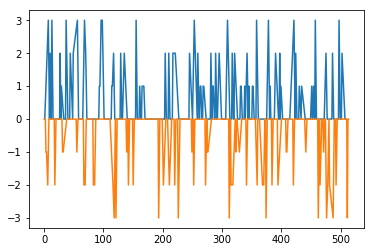

In [79]:
plt.plot(data_game[data_game['HomePlay'].notnull()]['PointsAdded'])
plt.plot(-data_game[data_game['AwayPlay'].notnull()]['PointsAdded'])

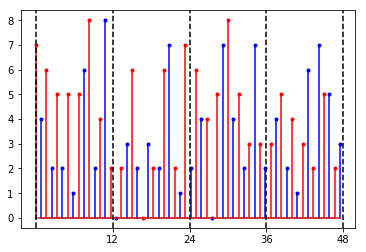

In [211]:
H = data_game[data_game['HomePlay'].notnull()][['PointsAdded','TotalSecLeft']]
A = data_game[data_game['AwayPlay'].notnull()][['PointsAdded','TotalSecLeft']]
#bin_count = []
width = 20*5
tbins = np.arange(0,2880,width)
Hdig = np.digitize(2880 - H['TotalSecLeft'],tbins,right=False)
Adig = np.digitize(2880 - A['TotalSecLeft'],tbins,right=False)
Hcount = [H[Hdig == n]['PointsAdded'].sum() for n in np.unique(Hdig)]
Acount = [A[Adig == n]['PointsAdded'].sum() for n in np.unique(Adig)]
plt.stem(tbins/60,Hcount,linefmt='-r',markerfmt='.r') #,width/60,facecolor='none',edgecolor='blue')
plt.stem(tbins/60 + width/60/2,Acount,linefmt='-b',markerfmt='.b') #,width/60,facecolor='none',edgecolor='orange')
plt.xticks([12,24,36,48])
[plt.axvline((2880/60/4)*i,linestyle='--',color='k') for i in range(0,5)]
#plt.xlim(-0.5,2880/60+0.5)

In [ ]:
from math import abs

In [258]:
T = data_game[['ScoreDiff','TotalSecLeft']]
mat = np.zeros((51,51))
for ti in range(0,2880):
    T_window = T[(2880 - T['TotalSecLeft'] >=ti) & (2880 - T['TotalSecLeft'] < ti+200)]
    #T_window_dig = np.digitize(2880 - T_window['TotalSecLeft'],tbins,right=False)
    ii = T_window.iloc[0,0]
    jj = T_window.iloc[0,-1]
    if ii > 25: ii = 25
    elif ii < -25: ii = -25
    else: ii = int(ii)
    if jj > 25: jj = 25
    elif jj < -25: jj = -25
    else: jj = int(jj)
    #print(ii,jj)
    mat[ii + 25,jj+25] +=1
mat.sum()

2880.0

In [259]:
row_sums = mat.sum(axis=1)
new_mat = mat / row_sums[:, np.newaxis]
np.nan_to_num(new_mat).sum()

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


24.0

/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/james/miniconda3/envs/bursts/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


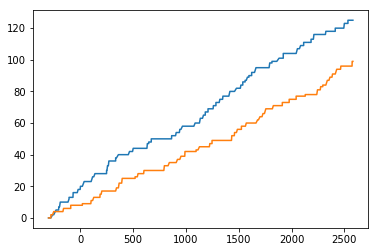

In [13]:
plt.plot(2580 - data_game['TotalSecLeft'],data_game['HomeScore'])
plt.plot(2580 - data_game['TotalSecLeft'],data_game['AwayScore'])

In [159]:
t

array([0.])